<a href="https://colab.research.google.com/github/Sbilalahmad/AI_ML_mentorship/blob/main/notebooks/P1_Crop_Yeild_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What we'll learn in this project** \
1-How get data?\
2-Exploring data.\
3-Preprocessing data\
4-Performing EDA.(Exploratory Data Analysis)\
5-Use column transformer (One hot encoding, standardizations)\
6-Train test split.\
7-Training multiple models.\
8-Selection best model\
9-Creating website.\
10-Model integrate with website

# **How and where to get data**.\
## **1. Public Datasets Repositories**

### **General ML Datasets:**
- **Kaggle Datasets** - [kaggle.com/datasets](https://www.kaggle.com/datasets) - Largest collection, competitions included
- **UCI Machine Learning Repository** - [archive.ics.uci.edu](https://archive.ics.uci.edu/) - Classic academic datasets
- **Google Dataset Search** - [datasetsearch.research.google.com](https://datasetsearch.research.google.com/)
- **AWS Open Data Registry** - [registry.opendata.aws](https://registry.opendata.aws/)

### **Computer Vision:**
- **ImageNet** - [image-net.org](https://www.image-net.org/) - 14M+ images, 20K categories
- **COCO** - [cocodataset.org](https://cocodataset.org/) - Object detection, segmentation
- **Open Images** - [storage.googleapis.com/openimages](https://storage.googleapis.com/openimages/web/index.html) - 9M images
- **MNIST** - Handwritten digits (classic beginner dataset)
- **CIFAR-10/100** - Small image classification

### **NLP & Text Data:**
- **Hugging Face Datasets** - [huggingface.co/datasets](https://huggingface.co/datasets) - 40K+ datasets
- **Common Crawl** - [commoncrawl.org](https://commoncrawl.org/) - Web crawl data
- **Wikipedia Dumps** - [dumps.wikimedia.org](https://dumps.wikimedia.org/)
- **Project Gutenberg** - [gutenberg.org](https://www.gutenberg.org/) - 60K+ free eBooks

### **Audio/Speech:**
- **LibriSpeech** - [openslr.org/12](http://www.openslr.org/12/) - 1000 hours of speech
- **Common Voice** - [commonvoice.mozilla.org](https://commonvoice.mozilla.org/) - Crowdsourced voice data
- **AudioSet** - [research.google.com/audioset](https://research.google.com/audioset/)

## **2. Government & Open Data Portals**

- **data.gov** - US government data (200K+ datasets)
- **data.gov.uk** - UK government data
- **EU Open Data Portal** - [data.europa.eu](https://data.europa.eu/)
- **World Bank Data** - [data.worldbank.org](https://data.worldbank.org/)
- **NASA Open Data** - [data.nasa.gov](https://data.nasa.gov/)
- **CDC Data** - [data.cdc.gov](https://data.cdc.gov/)

## **3. Domain-Specific Sources**

### **Healthcare:**
- **MIMIC** - [physionet.org/content/mimiciii](https://physionet.org/content/mimiciii/) - ICU patient data
- **TCGA** - [cancergenome.nih.gov](https://www.cancergenome.nih.gov/) - Cancer genomics
- **UK Biobank** - [ukbiobank.ac.uk](https://www.ukbiobank.ac.uk/)

### **Finance:**
- **Quandl** - [quandl.com](https://www.quandl.com/) - Financial/economic data
- **Yahoo Finance API** - Historical stock data
- **Alpha Vantage** - [alphavantage.co](https://www.alphavantage.co/) - Free APIs

### **Geospatial:**
- **OpenStreetMap** - [openstreetmap.org](https://www.openstreetmap.org/)
- **USGS Earth Explorer** - [earthexplorer.usgs.gov](https://earthexplorer.usgs.gov/)
- **Sentinel Hub** - [sentinel-hub.com](https://www.sentinel-hub.com/) - Satellite imagery

### **Social Media:**
- **Twitter API** (with limitations)
- **Reddit API** - [reddit.com/dev/api](https://www.reddit.com/dev/api/)
- **Facebook Graph API** (requires approval)

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "yield_df.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "patelris/crop-yield-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-965618143.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 217k/217k [00:00<00:00, 547kB/s]

Extracting zip of yield_df.csv...
First 5 records:    Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


## **How to Perform Exploratory Data Analysis (EDA) in Machine Learning**

EDA is a **critical first step** in any ML project where you explore, understand, and visualize your data before modeling.



## **Key Checks & Insights to Document**

### **Data Quality Issues**
- Missing values pattern (MCAR, MAR, MNAR)
- Duplicate records
- Inconsistent formatting
- Invalid values (negative ages, future dates)

### **Statistical Insights**
- Skewness and kurtosis
- Outliers and their business logic
- Class imbalance (for classification)
- Multicollinearity

### **Business Insights**
- Feature relationships with target
- Seasonality/trends in time data
- Segment differences
- Data collection biases

---

## **EDA Checklist**
- [ ] Understand each feature's meaning
- [ ] Check data types and convert if needed
- [ ] Handle missing values appropriately
- [ ] Identify and treat outliers
- [ ] Analyze distributions and transformations needed
- [ ] Examine correlations and multicollinearity
- [ ] Validate assumptions for planned models
- [ ] Document findings and next steps

---

## **Common Pitfalls to Avoid**
1. **Ignoring domain knowledge** - Always consult subject matter experts
2. **Overlooking data leakage** - Keep future/test data separate
3. **Misinterpreting correlation as causation**
4. **Not checking for data drift** in time-series
5. **Forgetting to analyze missingness patterns**

---

## **Deliverables from EDA**
1. **EDA report** with visualizations and insights
2. **Data quality assessment** with issues and recommendations
3. **Feature engineering ideas** based on patterns discovered
4. **Modeling approach suggestions** (which algorithms might work well)
5. **Preprocessing pipeline** requirements

In [2]:
print(df.isna().sum())
print("____________________")
print(df.duplicated().sum())


Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
____________________
0


In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.duplicated().sum()


np.int64(2310)

In [6]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()
# .style.background_gradient(cmap='coolwarm')

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [10]:
dfc=df.drop(['Area','Item'],axis=1)
dfc.corr().style.background_gradient(cmap='coolwarm')

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [11]:
df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485.0
1,1485.0
2,1485.0
3,1485.0
4,1485.0
...,...
28237,657.0
28238,657.0
28239,657.0
28240,657.0


In [12]:
df['Area'].value_counts()

,count
Area,
India,3384
Brazil,1854
Mexico,1280
Australia,966
Pakistan,966
...,...
Latvia,42
Belgium,39
Bahrain,29


We can do the same grphically.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-19410900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'],palette='hls')


<Axes: xlabel='count', ylabel='Area'>

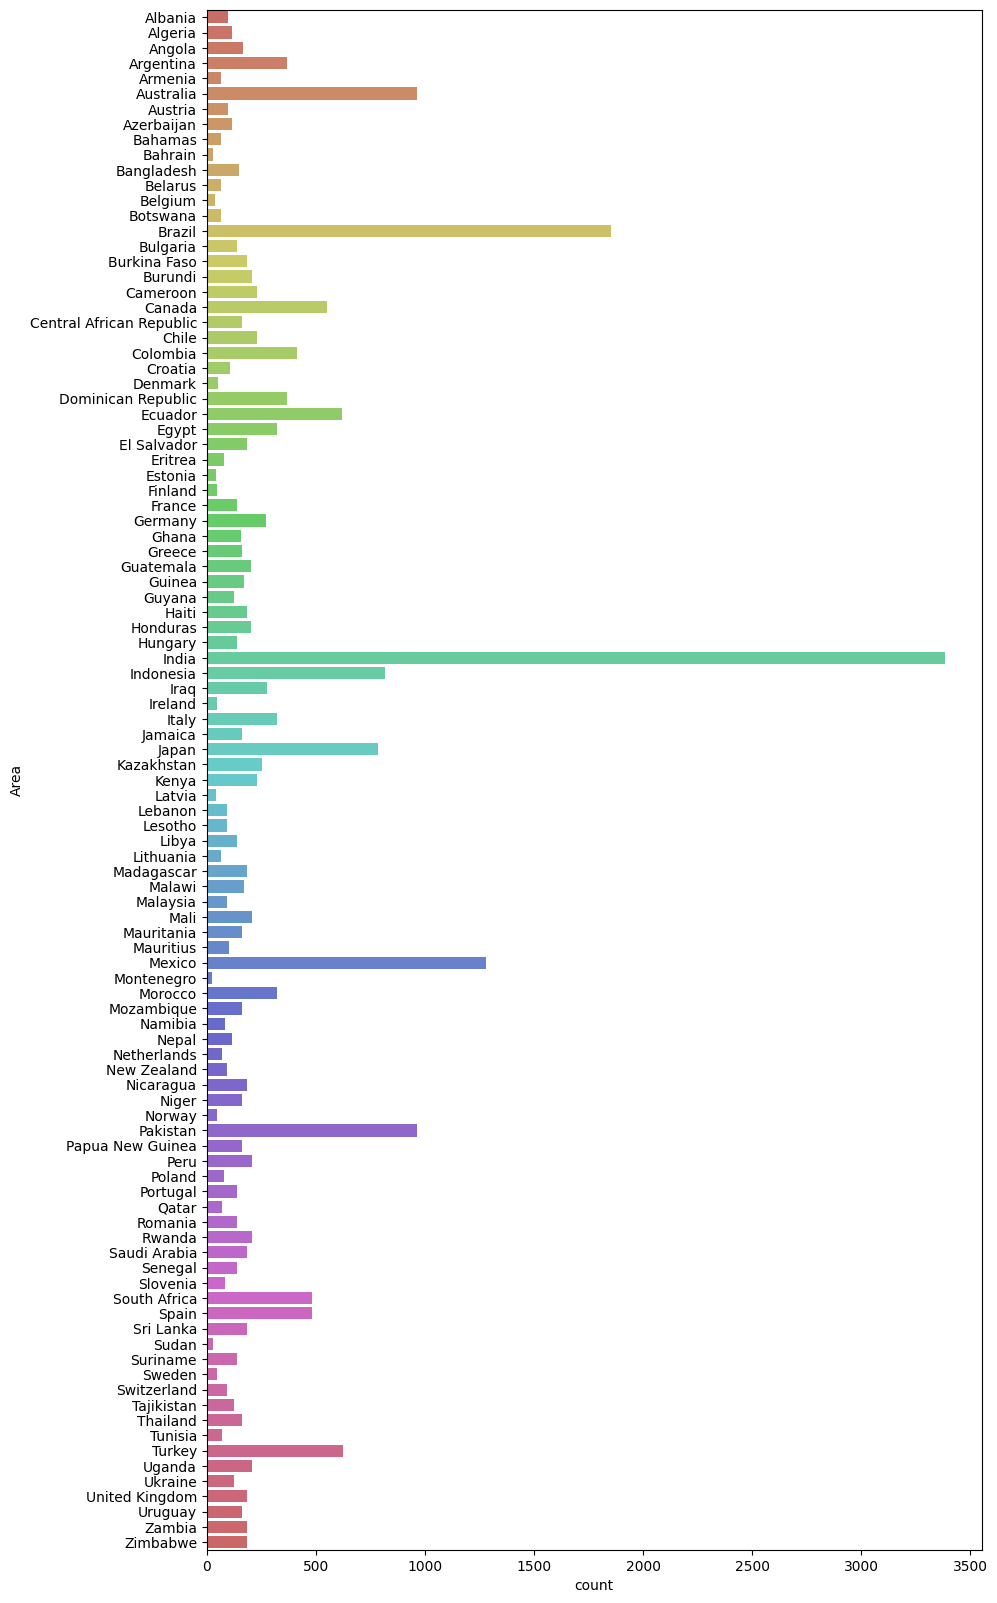

In [14]:
plt.figure(figsize=(10, 20))
sns.countplot(y=df['Area'],palette='hls')

In [15]:
df['Item'].value_counts()

,count
Item,
Potatoes,3956
Maize,3824
Wheat,3539
"Rice, paddy",3091
Soybeans,2940
Sorghum,2770
Sweet potatoes,2593
Cassava,1889
Yams,774


/tmp/ipython-input-3935864867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Item'],palette='hls',order=df['Item'].value_counts().index )


<Axes: xlabel='count', ylabel='Item'>

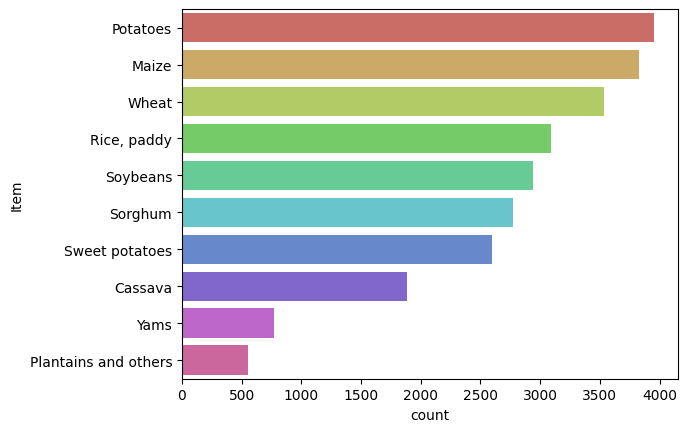

In [16]:
sns.countplot(y=df['Item'],palette='hls',order=df['Item'].value_counts().index )

In [17]:
yeild_per_area=df.groupby('Area')['hg/ha_yield'].sum()
yeild_per_area

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


/tmp/ipython-input-672089389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yeild_per_area,y=yeild_per_area.index,palette='hls')


<Axes: xlabel='hg/ha_yield', ylabel='Area'>

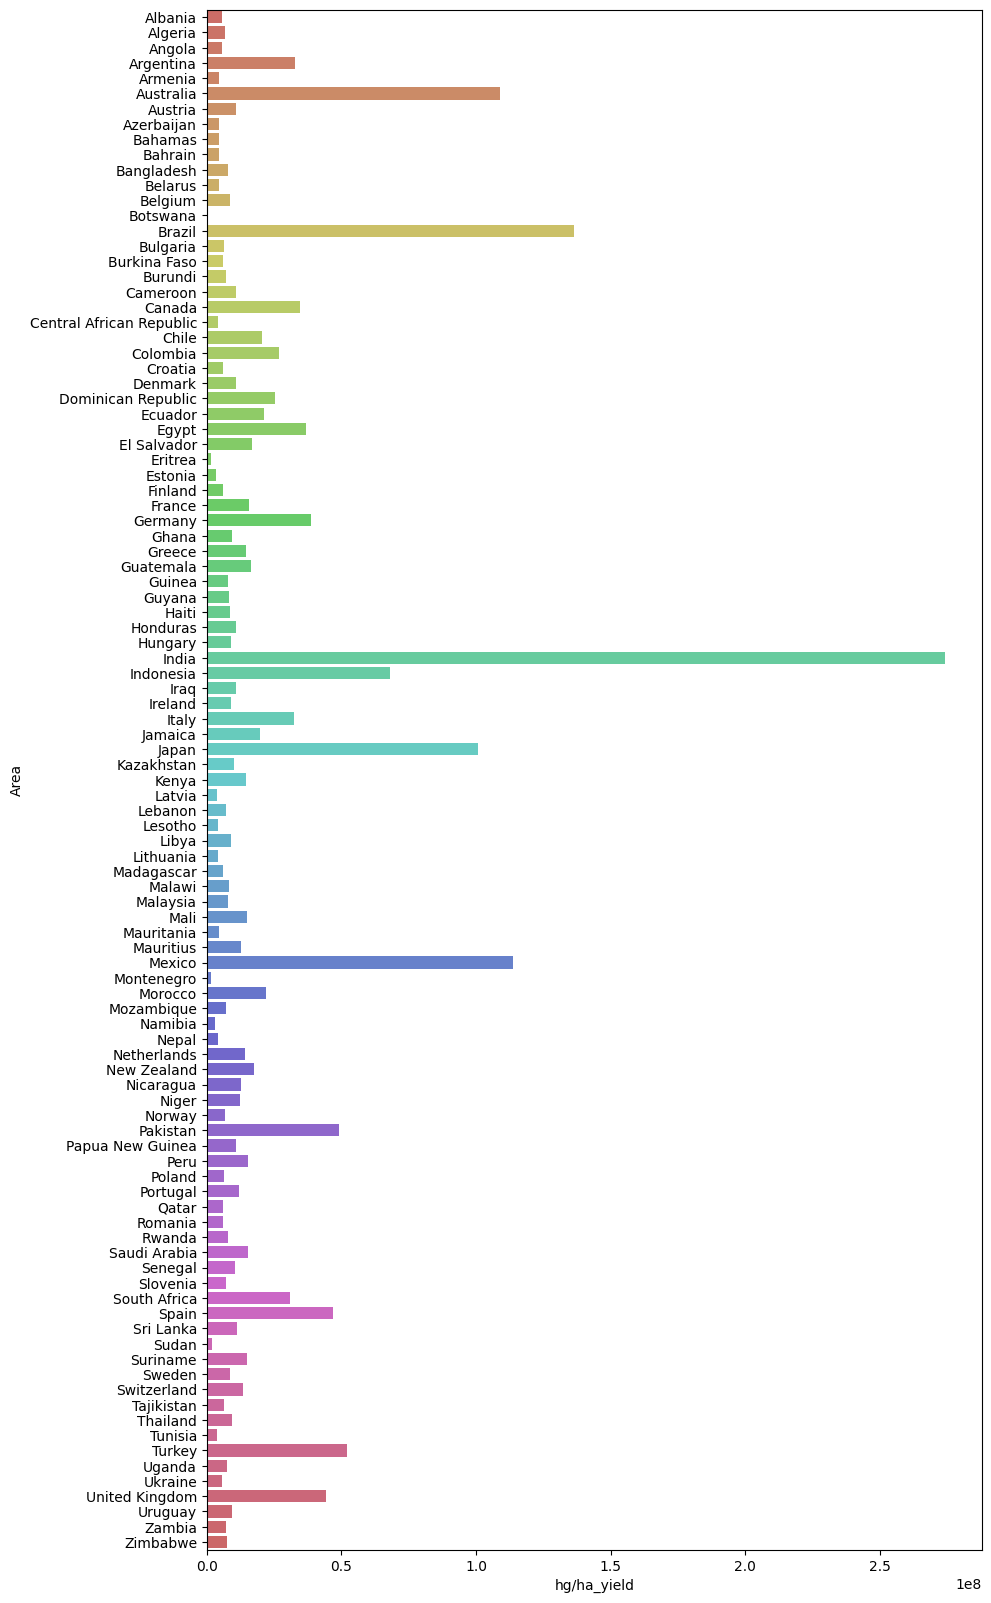

In [18]:
plt.figure(figsize=(10, 20))
sns.barplot(x=yeild_per_area,y=yeild_per_area.index,palette='hls')

In [19]:
X=df.drop(['hg/ha_yield'],axis=1)
Y=df['hg/ha_yield']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

**As we know machine can understand numeric stuff properly as compare to symbolicals.\
For converting or Encoding the catagorical data to numerical we'll do something here**\


---


###**Catagorical Data is of two types:**\
1.   **Ordinal Data**:-\
    eg: I,II,III,IV or first, second,third or Class A, Class B, Class C etc\
    for these types of data we use `OrdinalEncoder`
2.   **Nominal Data**:-\
    eg: Taj Mahal, Tomato, Japan, Narendra Modi, Green, Wood, etc\
    for these types of data we use `LabelEncoder & OneHotEncoder`



In [21]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [22]:
ohe=OneHotEncoder()
stdsc=StandardScaler()

In [23]:
X_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
19647,Mexico,Sorghum,2000,758.0,34468.93,16.11


In [25]:
preprocessor=ColumnTransformer(
    transformers=[
        ('OneHotEncoding',ohe,[0,1]),
        ('Standardization',stdsc,[2,3,4,5])
    ],
    remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(), [0, 1]),
                                ('Standardization', StandardScaler(),
                                 [2, 3, 4, 5])])

In [26]:
X_train_dummy=preprocessor.fit_transform(X_train)
X_test_dummy=preprocessor.transform(X_test)

In [28]:
X_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124470 stored elements and shape (20745, 115)>

In [27]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
lnrmodels={
    'lr':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    'dtr':DecisionTreeRegressor(),
    'knn':KNeighborsRegressor(),
}

In [30]:
for name , model in lnrmodels.items():
    model.fit(X_train_dummy,Y_train)
    y_pred=model.predict(X_test_dummy)
    print(f"{name} :R2 score = {r2_score(Y_test,y_pred)*100}, MSA = {mean_absolute_error(Y_test,y_pred)}")

lr :R2 score = 74.42617731412476, MSA = 29118.54240697282
ridge :R2 score = 74.43296852674905, MSA = 29078.86008096325
lasso :R2 score = 74.42825462642386, MSA = 29100.546614605508
dtr :R2 score = 97.68272990721081, MSA = 3958.3529978793135
knn :R2 score = 98.4234977734783, MSA = 4370.204665509929


In [43]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train_dummy,Y_train)

DecisionTreeRegressor()

In [44]:
y_pred=dtr.predict(X_test_dummy)
y_pred

array([64441., 17791., 35878., ..., 24333., 70808., 10415.])

In [45]:
from joblib.pool import np
def predict_yield(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
  features=np.array([[Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
  features_dummy=preprocessor.transform(features)
  predicted_values=dtr.predict(features_dummy)
  return predicted_values[0]

In [46]:
df.head(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [50]:
Area="Mexico"
Item="Sorghum"
Year=2000
average_rain_fall_mm_per_year=758.0
pesticides_tonnes=34468.93
avg_temp=16.11

result=predict_yield(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)
print(result)

30762.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
import pickle
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))
pickle.dump(dtr,open('Crop_yeild_predictor.pkl','wb'))